In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_excel("/kaggle/input/pharmacy-data2/data.xlsx",skiprows=[1])
df.drop(columns=[ 'Machine Code',   'Is Dawaa Insurance', 'Is Insurance Approval', 'Insurance Approval', 'Insurance Type', 'Nphies Action Type', 'Nphies Member Id', 'Nphies Payer Code', 'Nphies Auth Id', 'Gender', 'Nationality', 'Total Value', 'Discount Value','Vat Value', 'Gross Value', 'Supervisor', 'Senior', 'District', 'Region', 'POS Version'] , inplace=True)
print(df.head(10))

/kaggle/input/pharmacy-data2/data.xlsx
  Location  Receipt Number Order No  DeliveryNo  Trx Month   Trx Date  \
0    P0175          699855      NaN         NaN 2024-12-01 2024-12-01   
1    P0175          699856      NaN         NaN 2024-12-01 2024-12-01   
2    P0175          699857      NaN         NaN 2024-12-01 2024-12-01   
3    P0175          699858      NaN         NaN 2024-12-01 2024-12-01   
4    P0175          699860      NaN         NaN 2024-12-01 2024-12-01   
5    P0175          699862      NaN         NaN 2024-12-01 2024-12-01   
6    P0175          699864      NaN         NaN 2024-12-01 2024-12-01   
7    P0175          699866      NaN         NaN 2024-12-01 2024-12-01   
8    P0175          699869      NaN         NaN 2024-12-01 2024-12-01   
9    P0175          699872      NaN         NaN 2024-12-01 2024-12-01   

             Trx Time Trx Type Trx Status Document Type  ... Customer Name  \
0 1900-01-01 00:08:25    Sales      Paper       Regular  ...           NaN   
1

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [ ]:
print(df.columns)

In [ ]:
fig,ax = plt.subplots(2,figsize=(8,6))
df['Net Value'].hist(ax=ax[0],bins=12)
loyal_customers = df[df['Loyalty Name'].notna()]
non_loyal =  df[df['Loyalty Name'].isna()]

top_sales =  df.groupby('Loyalty Name')['Net Value'].sum()
df['Net Value'].plot.box(ax=ax[1],vert=False)


In [ ]:
fig,ax = plt.subplots(2,figsize=(8,6))
df_filtered = df.loc[ df['Net Value'] < 1000].reset_index()
df_filtered['Net Value'].hist(ax=ax[0],bins=20)

df_filtered['Net Value'].plot.box(ax=ax[1],vert=False)

In [ ]:
trx_date = df['Trx Date'][:10]
print(trx_date)

In [ ]:
columns_names = df.columns
columns_dtpes = df.dtypes
print(columns_names.tolist())
print(columns_dtpes)

In [ ]:
selected_columns = df.select_dtypes(include=['float64' , 'int64'])
df_corr = selected_columns.corr()

plt.figure(figsize=(10,8))
sns.heatmap(df_corr , annot = True, cmap='coolwarm')
plt.title("Data Corrleation")
plt.show()

In [ ]:
df = df.set_index('Trx Date')


In [ ]:
# df = pd.read_csv('opsd_germany_daily.csv', index_col=0,
#                          parse_dates=True)

# # Add columns with year, month, and weekday name
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()
# # # Display a random sampling of 5 rows
print(df.sample(5, random_state=0))



# print(df.loc['2024-12-10'])
# print("---------------")
# print(df.loc['2024-12-10': '2024-12-12'])
# print("---------------")
# print(df.loc['2024-12'])

# print("---------------")

  
 

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})

start_date = '2024-12-1'
end_date = '2024-12-20'

daily_sales =  df.loc[start_date:end_date]

# sales_merged = pd.merge(net , df['Weekday Name'] , on='Trx Date' )
# print(daily_sales)
net = daily_sales.groupby(daily_sales.index)['Net Value'].sum()

sales_merged = pd.merge(net , df['Weekday Name'] , on='Trx Date' ).drop_duplicates()
print( len( sales_merged['Weekday Name']))

plt.figure(figsize=(10,8))
plt.plot( range(len( sales_merged['Weekday Name'])) , sales_merged['Net Value'] , marker='o')
plt.xticks( range(len( sales_merged['Weekday Name'])) ,  sales_merged['Weekday Name'] , rotation=45)
plt.grid(True)

# #============================================================

# fig, ax = plt.subplots()
# ax.plot(opsd_daily.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
# ax.set_ylabel('Daily Consumption (GWh)')
# ax.set_title('Jan-Feb 2017 Electricity Consumption')
 
# #============================================================
 
# fig, axes = plt.subplots(3, 1, figsize=(7, 6), sharex=True)
# for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
#     sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax)
#     ax.set_ylabel('GWh')
#     ax.set_title(name)
    
# # Remove the automatic x-axis label from all but the bottom subplot
# if ax != axes[-1]:
#     ax.set_xlabel('')

# #============================================================

# sns.boxplot(data=opsd_daily, x='Weekday Name', y='Consumption');

In [ ]:
print(sales_merged)

In [ ]:
sales =df[df['Trx Type'] == "Sales" ]['Net Value'].sum()
print(f'{sales:,.0f}')
return_sales = abs(df[df['Trx Type'] == "Return" ]['Net Value'].sum())
print(f'{return_sales:,.0f}')

sales_ration  = (sales / (sales + return_sales) )* 100
return_ratio  = (return_sales / (sales + return_sales) )* 100
print(sales_ration)
print(return_ratio)

fig,ax = plt.subplots(3,1,figsize=(8,12))

ax[0].bar(['sales' , 'return'], [sales,return_sales] )
ax[0].set_title('sales vs return')
ax[0].set_xlabel('sales type')
ax[0].set_ylabel('value')
ax[0].legend()


ax[1].scatter(['sales' , 'return'], [sales,return_sales] ,color=['red','black'] )
ax[1].set_title('sales vs return')
ax[1].set_xlabel('sales type')
ax[1].set_ylabel('value')
ax[1].legend()

ax[1].set_title('sales vs return')
ax[2].pie([sales_ration , return_ratio] , labels=['sales' , 'return'] ,colors=['lightgreen' , 'red'] , autopct='%1.1f%%')
plt.tight_layout()
plt.show()

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()



# sales_merged.plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Month', fontsize=10);


 

 
netValue = df[['Net Value']]
# netValue.rolling(30).mean().plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Month', fontsize=10);

 
# gym = df[['gym']]
# gym.rolling(12).mean().plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Year', fontsize=10);


 
# df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
# df_rm.plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Year', fontsize=10);

 
netValue.diff().plot(figsize=(7,4), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10);


# df.plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Year', fontsize=10);



df.corr()


# df.diff().plot(figsize=(7,4), linewidth=1, fontsize=10)
# plt.xlabel('Year', fontsize=10);


# df.diff().corr()

# pd.plotting.autocorrelation_plot(diet);






In [4]:
df['Trx Time'] = pd.to_datetime(df['Trx Time'] , format=("%H:%M:%S")).dt.hour


In [ ]:
rash_hour = df.groupby(['Trx Date' , 'Trx Time']).size().reset_index(name='Tranaction Count')
sorted_hour = rash_hour.sort_values(by=['Tranaction Count'] , ascending=False)

plt.bar(rash_hour['Trx Time'] , rash_hour['Tranaction Count'])
plt.xlabel('Trx Time')
plt.ylabel('Trx Count')
plt.title('Tranaction Count every Hour')
plt.xticks(range(24))
plt.show()

In [ ]:
rash_hour_perstaff = df.groupby(['Trx Date' , 'Trx Time' , 'Staff ID']).size().reset_index(name='Tranaction Count')
# print(rash_hour_perstaff[:30])
pivot_rash_hour_perstaff = rash_hour_perstaff.pivot_table(index='Trx Time' , columns='Staff ID' , values='Tranaction Count' , aggfunc='sum',fill_value=0)

def formate_num(value):
    return f"{value:,.0f}"
    
# formated_pivot_table = pivot_rash_hour_perstaff.map(formate_num)

# print(formated_pivot_table)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_rash_hour_perstaff , annot=True , fmt=',.0f' , cbar_kws={'format': '%.0f'} ,cmap='YlGnBu')
plt.title("pivot_rash_hour_perstaff")

plt.xlabel('staff id')
plt.ylabel('hours ber day')

plt.show()

Staff ID        3611        9174
Trx Time                        
0          55.598086  109.536583
1          52.275340   46.956182
2          38.006667    0.000000
8           0.000000   52.700000
9          57.663207   51.781346
10         78.380692   86.586361
11         83.537905   90.489421
12         53.262731   78.004666
13        100.722947   94.992173
14         78.126726   85.641267
15         47.505952   73.059668
16         66.004415   74.523480
17         58.285724   92.361831
18         59.513869   87.627008
19         58.618968   66.261100
20         74.773715   72.260457
21         60.889838   81.134534
22         60.596373   70.612200
23         62.873926   80.794078


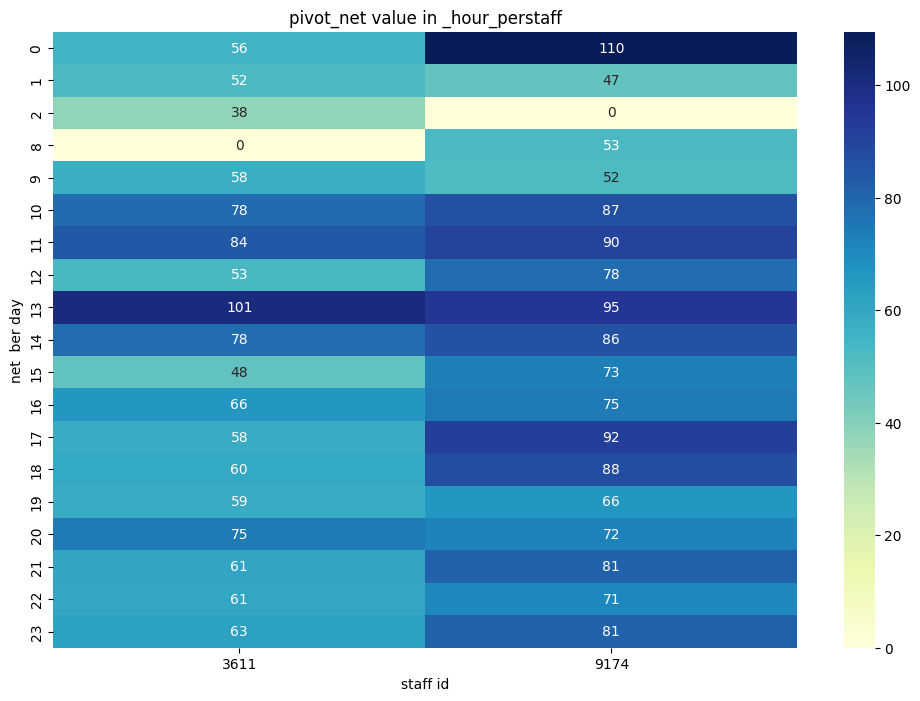

In [10]:
df_filtered = df[df['Staff ID'] !=  3098]

transcion_value_in_hr_berid = df_filtered.groupby(['Trx Date' , 'Trx Time' , 'Staff ID'])['Net Value'].mean().reset_index(name='transcion net')

pivot_table__net_staffid = transcion_value_in_hr_berid.pivot_table(index='Trx Time' , columns='Staff ID' , values='transcion net' ,fill_value=0)
print(pivot_table__net_staffid)
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table__net_staffid , annot=True , cmap='YlGnBu', fmt=',.0f' , cbar_kws={'format': '%.0f'}  )
plt.title("pivot_net value in _hour_perstaff")
plt.xlabel('staff id')
plt.ylabel('net  ber day')

plt.show()

0       9174
1       9174
2       9174
3       3611
4       3611
        ... 
6702    9174
6703    9174
6704    9174
6705    9174
6706    9174
Name: Staff ID, Length: 6702, dtype: int64
